In [ ]:
#Bu projede, Banka Müşteri Kaybı (Customer Churn) veri setini kullanarak bankanın müşterilerinin hizmetlerinden ayrılma durumlarını tahmin etmeye çalışacağız.

1) KÜTÜPHANELERİ İMPORT ETME - VERİ SETİNİ YÜKLEME

In [13]:
#Kullanılacak gerekli kütüphaneleri import edelim:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#verisetini yükleyelim:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GlobalAI Proje/botswana_bank_customer_churn.csv')

#İlk 5 satırı görüntüleyelim:
df.head()

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,...,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,...,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,...,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,...,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,...,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6


2) KEŞİFSEL VERİ ANALİZİ (EDA)

In [14]:
# Veri setini tanıyalım : Keşifsel Veri Analizi (EDA - Exploratory Data Analysis):
# Dataframe in genel bilgilerine bakalım:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [15]:
# istatistikleri görmek için
df.describe()

,RowNumber,Number of Dependents,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,57820.500000,2.502923,52641.363046,15.490591,574.299775,15.546602,25502.731792,0.121878,124639.209748,2.999274,4.991724
std,33382.536902,1.707249,27429.756390,8.654217,159.067499,8.654630,14127.859827,0.327147,72210.476638,1.411361,3.159283
min,1.000000,0.000000,5000.960000,1.000000,300.000000,1.000000,1000.430000,0.000000,1.060000,1.000000,0.000000
25%,28910.750000,1.000000,28857.070000,8.000000,436.000000,8.000000,13226.060000,0.000000,61991.915000,2.000000,2.000000
50%,57820.500000,3.000000,52658.110000,15.000000,574.000000,16.000000,25505.285000,0.000000,124505.890000,3.000000,5.000000
75%,86730.250000,4.000000,76364.157500,23.000000,712.000000,23.000000,37742.250000,0.000000,187122.922500,4.000000,8.000000
max,115640.000000,5.000000,99999.510000,30.000000,850.000000,30.000000,49999.690000,1.000000,249998.910000,5.000000,10.000000


In [16]:
# Sütun başlıkları:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'First Name', 'Date of Birth',
       'Gender', 'Marital Status', 'Number of Dependents', 'Occupation',
       'Income', 'Education Level', 'Address', 'Contact Information',
       'Customer Tenure', 'Customer Segment',
       'Preferred Communication Channel', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Churn Flag',
       'Churn Reason', 'Churn Date', 'Balance', 'NumOfProducts',
       'NumComplaints'],
      dtype='object')

In [17]:
# Müşteri kaybı durumu sayısal verisi: 0: Müşteri kaybı yok 1: Müşteri kaybı var
df["Churn Flag"].value_counts()

,count
Churn Flag,
0,101546
1,14094


In [18]:
#boş değer kontrolü: isnull()
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
First Name,0
Date of Birth,0
Gender,0
Marital Status,0
Number of Dependents,0
Occupation,0
Income,0


3) VERİ ÖN İŞLEME

In [19]:
# Kategorik değişkenleri sayısal verilere dönüştürme: Label Encoding işlemi
le=LabelEncoder()

#kategorik verilerimizi görelim:
categorical_columns= df.select_dtypes(include=["object"]).columns
print(categorical_columns)

#kategorik verilerimizi sayısal verilere dönüştürelim :
for col in categorical_columns:
  df[col] = le.fit_transform(df[col])

# Özellikleri ve hedef değişkeni ayırma:
X= df.drop(['Churn Flag','Churn Reason', 'Churn Date'], axis=1)
y=df['Churn Flag']

# Veriyi eğitim ve test kümelerine ayırma:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

#veriyi normalize etme işlemi:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Index(['CustomerId', 'Surname', 'First Name', 'Date of Birth', 'Gender',
       'Marital Status', 'Occupation', 'Education Level', 'Address',
       'Contact Information', 'Customer Segment',
       'Preferred Communication Channel', 'Churn Reason', 'Churn Date'],
      dtype='object')


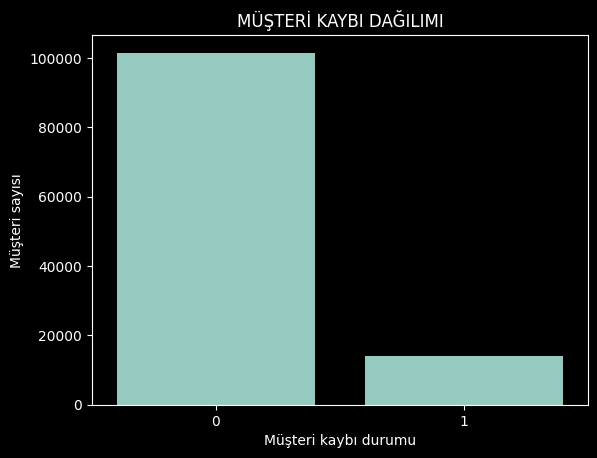

In [20]:
#Görselleştirme:
#Hedef değişkenin dağılımı: Hedef değişken: "Churn Flag"
plt.style.use('dark_background')
sns.countplot(x='Churn Flag', data=df)
plt.title("MÜŞTERİ KAYBI DAĞILIMI")
plt.xlabel("Müşteri kaybı durumu")
plt.ylabel("Müşteri sayısı")
plt.show()

4) ALGORİTMA SEÇİMİ & HİPERPARAMETRE OPTİMİZASYONU

A) SUPERVISIDED LEARNING (GÖZETİMLİ ÖĞRENME) :

In [21]:
#1) GÖZETİMLİ ÖĞRENME ALGORİTMALARI : LOJİSTİK REGRESYON(LOGISTIC REGRESSION)
# Model seçimi:
model= LogisticRegression()

# Modeli eğitme:
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Model değerlendirme:
# Tahmin:
y_pred= model.predict(X_test)

# Sonuçları değerlendirme:
print("Doğruluk skoru:" , accuracy_score(y_test, y_pred))
print("Sınıflandırma raporu:\n" , classification_report(y_test, y_pred))

#Karmaşıklık matrisi:
print("Karmaşıklık matrisi: " , confusion_matrix(y_test, y_pred))

# Sonuçlara baktığımızda doğruluk skoru yaklaşık %92.165 sinin doğru olduğunu göstermektedir. Oldukça iyi bir skor.
# Sınıflandırma raporunda ise durum:
# 0 için: Precision: 0.94 ,Recall: 0.97, F1-Score: 0.96
# 1 için: Precision: 0.74, Recall: 0.55, F1-Score: 0.63
# Model, müşteri kalma durumunu YÜKSEK bir başarı oranıyla tahmin ederken,
# müşteri kaybı tahminlerinde daha DÜŞÜK bir performans sergilemektedir.

Doğruluk skoru: 0.99922172258734
Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20301
           1       1.00      1.00      1.00      2827

    accuracy                           1.00     23128
   macro avg       1.00      1.00      1.00     23128
weighted avg       1.00      1.00      1.00     23128

Karmaşıklık matrisi:  [[20296     5]
 [   13  2814]]


In [23]:
# Farklı bir modelde deneyelim:
# Model seçimi: KNN (K-Nearest Neighbors) ve eğitme:
knn=KNeighborsClassifier().fit(X_train,y_train)

# Tahmin:
y_pred_knn=knn.predict(X_test)

# Sonuçları değerlendirme:
print("Doğruluk skoru:" , accuracy_score(y_test, y_pred))
print("Sınıflandırma raporu:\n" , classification_report(y_test, y_pred))

#Karmaşıklık matrisi:
print("Karmaşıklık matrisi: " , confusion_matrix(y_test, y_pred))

# Sonuçlara baktığımızda Lojistik regresyon modeli ile birebir aynı sonuçlar elde edildi.
# Bu yüzden en iyi skorları görmek için hiperparametre optimizasyonu yapılır.

Doğruluk skoru: 0.99922172258734
Sınıflandırma raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20301
           1       1.00      1.00      1.00      2827

    accuracy                           1.00     23128
   macro avg       1.00      1.00      1.00     23128
weighted avg       1.00      1.00      1.00     23128

Karmaşıklık matrisi:  [[20296     5]
 [   13  2814]]


In [24]:
# Farklı bir modelde deneyelim:
# Model seçimi: SVM ALGORİTMASI ve eğitme:
#svm = SVC(kernel='rbf', gamma='scale')

# Modeli eğitme:
#svm.fit(X_train,y_train)

# Tahmin:
#y_pred_svm=svm.predict(X_train#)

# Sonuçları değerlendirme:
#print("Doğruluk skoru:" , accuracy_score(y_test, y_pred))
#print("Sınıflandırma raporu:\n" , classification_report(y_test, y_pred))

# Sonuçlara baktığımızda Lojistik regresyon modeli ve knn  ile birebir aynı sonuçlar elde edildi.

In [25]:
# HİPERPARAMETRE OPTİMİZASYONU:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Hiperparametreler için bir grid tanımlama:
param_grid= {
    "n_neighbors": [3, 5],
    "metric": ["euclidean" , "manhattan"]
}

# GridSearchCV ile modelin optimize edilmesi:
grid_search= GridSearchCV(estimator=knn, param_grid= param_grid, cv=2, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler ve en iyi skoru gösterme:
print("En iyi hiperparametreler:" , grid_search.best_params_)
print("En iyi skorlar:" , grid_search.best_score_)

# Sonuç değerlendirmesi :


En iyi hiperparametreler: {'metric': 'manhattan', 'n_neighbors': 5}
En iyi skorlar: 0.9136976824628156


B) UNSUPERVISIDED LEARNING (GÖZETİMSİZ ÖĞRENME) :


In [31]:
from sklearn.cluster import KMeans
# Model seçimi: KNN (K-Means Clustering) ve eğitme, cluster değişkenini tanımlama:
kmeans= KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X)
clusters=kmeans.labels_

#Sağlıklı sonuçlar elde edebilmek adına birkaç yöntem deneyelim:

#İlk önce silhouette score deneyelim :
from sklearn.metrics import silhouette_score

#Silhouette skoru, her bir veri noktasının kendi kümesindeki benzerliği ile en yakın komşu kümesindeki benzerliğini ölçer.
#Skor 1'e yakınsa, nokta iyi bir kümede; 0'a yakınsa, belirsiz; -1'e yakınsa kötü bir kümededir.

silhouette_avg= silhouette_score(X, clusters)
print("Silhouette skoru: ", silhouette_avg)

#SONUÇ OLARAK; Silhouette skoru:  0.13262445846550758
# Düşük Değer: Bu değer, kümeler arasında belirgin bir ayrım olmadığını gösterir.Farklı küme sayılarında da düşük değer gözlemlendi.

Silhouette skoru:  0.13262445846550758


In [32]:
# ikinci olarak Normalized Mutual Information (NMI):
from sklearn.metrics import normalized_mutual_info_score
nmi_score= normalized_mutual_info_score(y, clusters)
print("Normalized Mutual Information Skoru:", nmi_score)

#SONUÇ OLARAK; Normalized Mutual Information Skoru: 0.13298824767984513
#Düşük Değer:kümeleme sonuçları ile gerçek etiketler arasında zayıf bir ilişki var.

Normalized Mutual Information Skoru: 0.13298824767984513


In [33]:
#Son olarak Adjusted Rand Index (ARI) :
from sklearn.metrics import adjusted_rand_score
ari_score=adjusted_rand_score(y, clusters)
print("Adjusted Rand Score: ", ari_score)

#SONUÇ OLARAK;Adjusted Rand Score:  0.04424259644980908
#Düşük Değer: kümeleme sonuçları ile gerçek etiketler arasında anlamlı bir ilişki yok.

Adjusted Rand Score:  0.04424259644980908
